In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, SimpleRNN, Dense, LSTM

In [22]:
import pandas as pd
import numpy as np

# 설정
np.random.seed(42)
n_days = 730
initial_price = 10000

# 임의의 주가 변동 생성
prices = [initial_price]
for _ in range(1, n_days):
    # 전일 대비 0%에서 2% 사이의 변동을 무작위로 생성
    change_percent = 0.02 * np.random.randn()  
    prices.append(prices[-1] * (1 + change_percent))

# 데이터프레임 생성
df = pd.DataFrame(prices, columns=['Close'])

# CSV 파일로 저장
csv_filename = 'Simulated_Stock_Prices2.csv'
df.to_csv(csv_filename, index=False)
print("CSV 파일이 생성되었습니다:", csv_filename)


CSV 파일이 생성되었습니다: Simulated_Stock_Prices2.csv


Epoch 1/30
23/23 [==============================] - 1s 3ms/step - loss: 0.0240
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 3/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 5/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 9/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/30
23/23 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/30
23/23 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 13/30
23/23 [==============================

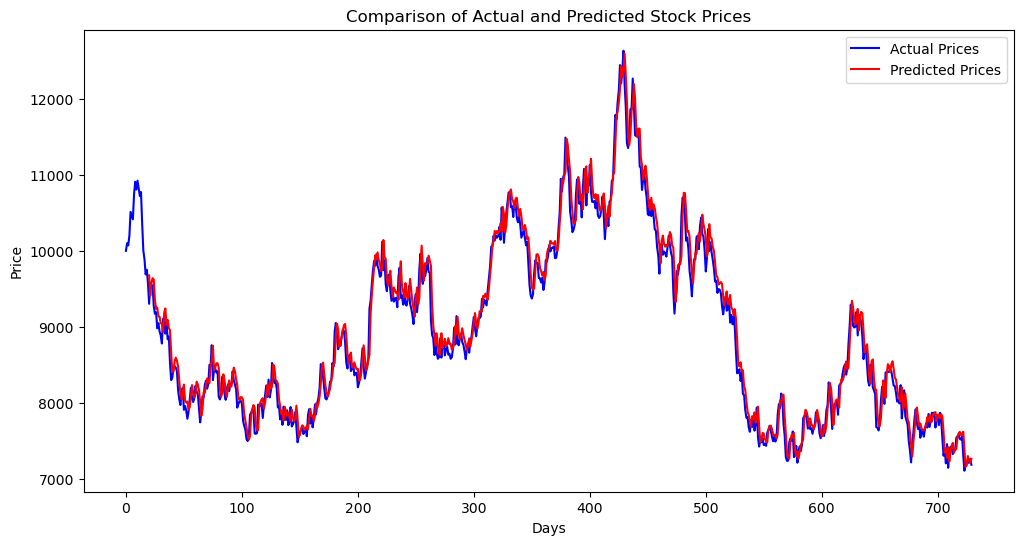

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 전처리
data = pd.read_csv('Simulated_Stock_Prices2.csv')
prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

# 시퀀스 데이터 생성 함수
window_size = 20  # 이동 창 크기 정의
def create_sequences(data, window_size=window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, time steps, features]
    y = np.array(y)
    return X, y

X, y = create_sequences(prices)

# 모델 구성
model = Sequential([
    SimpleRNN(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# 예측
predictions = model.predict(X)
predicted_prices = scaler.inverse_transform(predictions)  # 역정규화

# 실제 주가와 예측된 주가 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(prices).flatten(), label='Actual Prices', color='blue')
plt.plot(np.arange(window_size, len(prices)), predicted_prices.flatten(), label='Predicted Prices', color='red')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/30
11/11 [==============================] - 3s 7ms/step - loss: 0.0671
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 8/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 9/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 11/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 12/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 13/30
11/11 [==============================

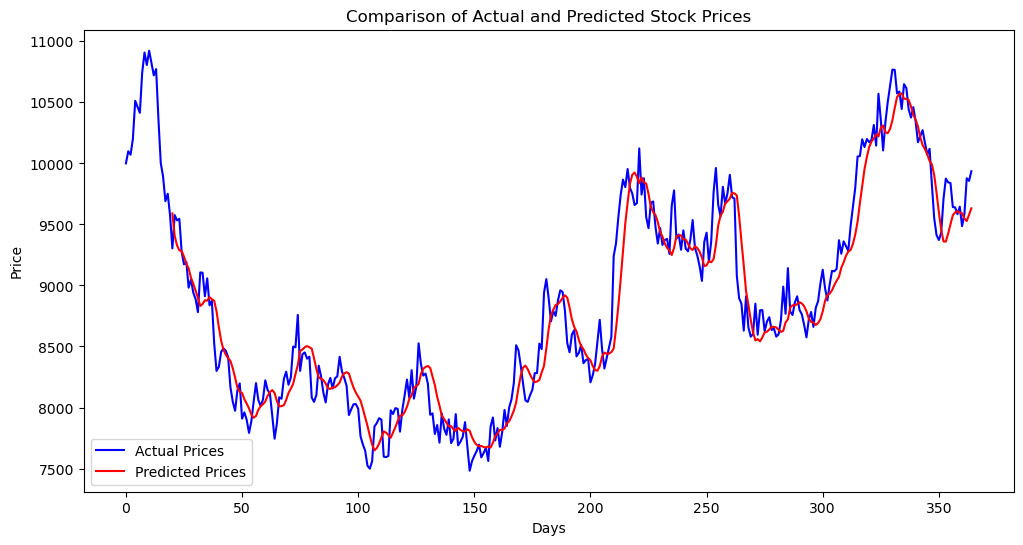

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 전처리
data = pd.read_csv('Simulated_Stock_Prices.csv')
prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

# 시퀀스 데이터 생성 함수
window_size = 20  # 이동 창 크기 정의
def create_sequences(data, window_size=window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, time steps, features]
    y = np.array(y)
    return X, y

X, y = create_sequences(prices)

# 모델 구성
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),  # LSTM 레이어로 변경
    
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# 예측
predictions = model.predict(X)
predicted_prices = scaler.inverse_transform(predictions)  # 역정규화

# 실제 주가와 예측된 주가 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(prices).flatten(), label='Actual Prices', color='blue')
plt.plot(np.arange(window_size, len(prices)), predicted_prices.flatten(), label='Predicted Prices', color='red')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


# Simple RNN

# LSTM